# 📘 SolarX Battery Controller Analysis


File: plot_solarx_battery_controller.ipynb

Author: Antonio Aparicio

> Este notebook carga los datos del CSV generado a partir del log y crea varias gráficas para analizar el comportamiento del sistema SolarX Battery Controller.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use("seaborn-v0_8-darkgrid")

## Test from 2-7 oct 2025

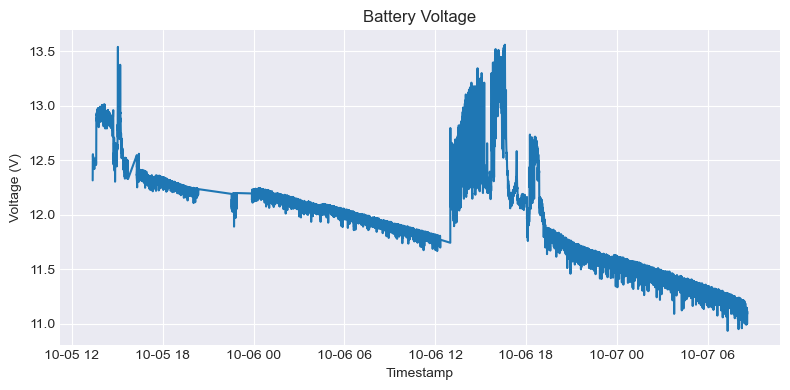

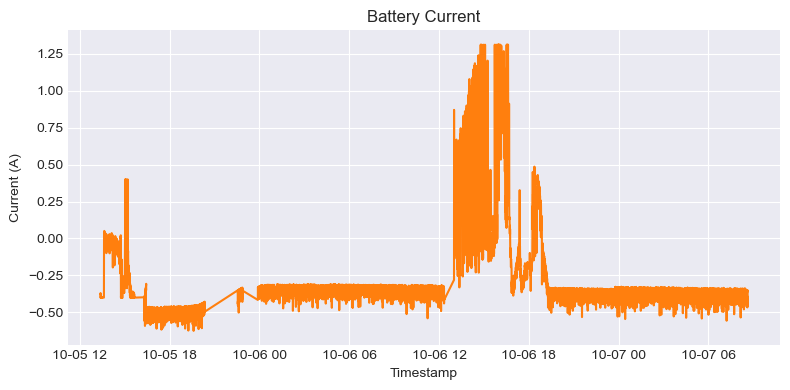

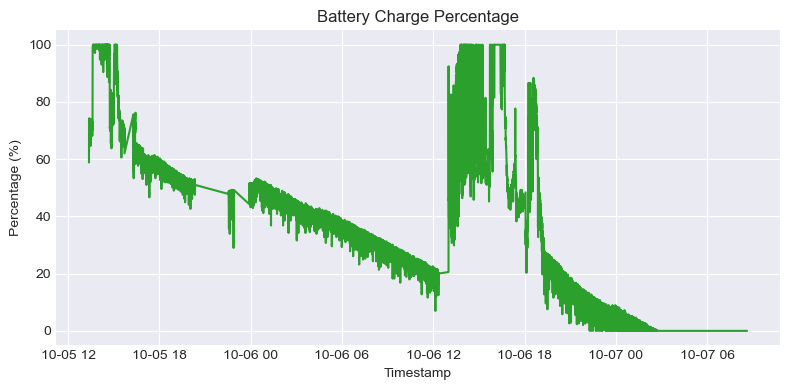

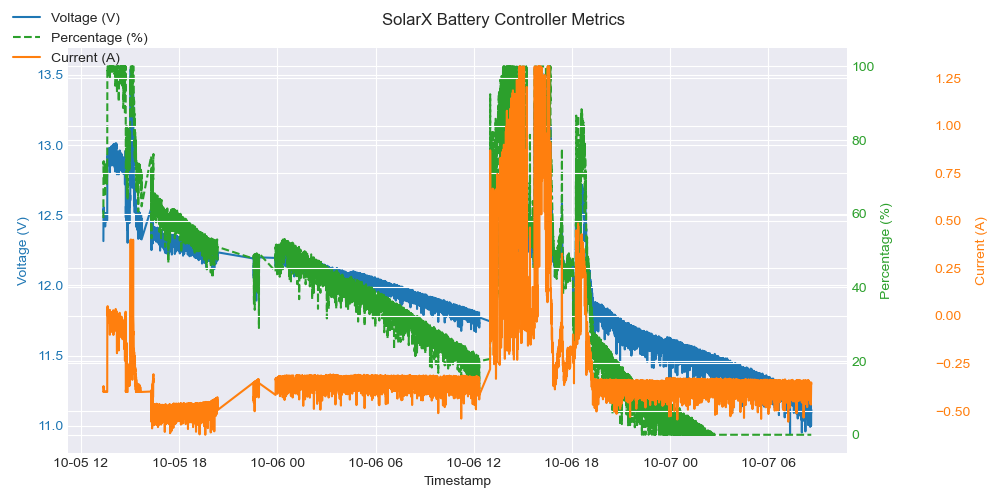

In [8]:
def plot_separate(df):
    # plt.ion()  # modo interactivo: muestra todas sin bloquear

    fig1 = plt.figure(figsize=(8, 4))
    plt.plot(df["timestamp"], df["voltage"], color="tab:blue")
    plt.title("Battery Voltage")
    plt.ylabel("Voltage (V)")
    plt.xlabel("Timestamp")
    plt.tight_layout()

    fig2 = plt.figure(figsize=(8, 4))
    plt.plot(df["timestamp"], df["current"], color="tab:orange")
    plt.title("Battery Current")
    plt.ylabel("Current (A)")
    plt.xlabel("Timestamp")
    plt.tight_layout()

    fig3 = plt.figure(figsize=(8, 4))
    plt.plot(df["timestamp"], df["percentage"], color="tab:green")
    plt.title("Battery Charge Percentage")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Timestamp")
    plt.tight_layout()

    plt.show()


def plot_combined(df):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Voltage axis
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel("Voltage (V)", color="tab:blue")
    ax1.plot(df["timestamp"], df["voltage"], color="tab:blue", label="Voltage (V)")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Percentage axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("Percentage (%)", color="tab:green")
    ax2.plot(df["timestamp"], df["percentage"], color="tab:green", label="Percentage (%)", linestyle="--")
    ax2.tick_params(axis="y", labelcolor="tab:green")

    # Current axis (third)
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))
    ax3.set_ylabel("Current (A)", color="tab:orange")
    ax3.plot(df["timestamp"], df["current"], color="tab:orange", label="Current (A)")
    ax3.tick_params(axis="y", labelcolor="tab:orange")

    fig.suptitle("SolarX Battery Controller Metrics")
    fig.tight_layout()
    fig.legend(loc="upper left")
    plt.show()



log_file_path = "log_2to7_oct_2025.csv"
df = pd.read_csv(log_file_path, parse_dates=["timestamp"])
plot_separate(df)
plot_combined(df)


## Test from 11-12 oct 2025

In [ ]:
# === 📂 Carga del CSV ===
log_file_path = "log_11_oct_2025_cc.csv"

df = pd.read_csv(log_file_path, parse_dates=["timestamp"])
df = df.sort_values("timestamp")

print("✅ Datos cargados correctamente")
print(df.head())


✅ Datos cargados correctamente
            timestamp  batteryVoltageVolts  panelVoltageVolts  \
0 2025-10-11 14:15:29               13.148          17.656000   
1 2025-10-11 14:15:59               13.128          17.656000   
2 2025-10-11 14:16:29               13.428          19.312000   
3 2025-10-11 14:16:59               13.432          18.464001   
4 2025-10-11 14:17:29               13.464          19.535999   

   batteryCurrentAmps  panelCurrentAmps  netPowerWatts  voltageSOCRnd  \
0            -0.09580            0.2878       6.304338             99   
1            -0.15720            0.2620       6.561225             99   
2             0.27360            0.5374       6.839116             99   
3             0.24372            0.5236       6.981515             99   
4             0.14212            0.5380       7.785124             99   

   coulombSOCRnd  combinedSOCRnd  voltageSOCAcc  coulombSOCAcc  \
0             49              54      99.999998      49.993989   
1      

C:\Users\admin\AppData\Local\Temp\ipykernel_26568\3703045601.py:4: FutureWarning: Parsed string "2025-10-11 14:15:29 INFO" included an un-recognized timezone "INFO". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv(csv_path, parse_dates=["timestamp"])


# === ⚡ Gráfico: Voltajes del sistema ===

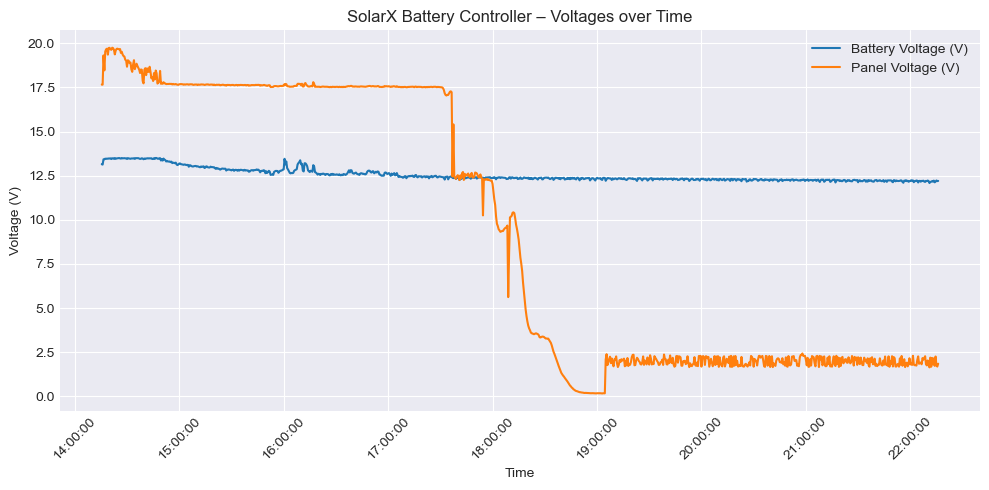

In [3]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["timestamp"], df["batteryVoltageVolts"], label="Battery Voltage (V)")
ax.plot(df["timestamp"], df["panelVoltageVolts"], label="Panel Voltage (V)")
ax.set_title("SolarX Battery Controller – Voltages over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Voltage (V)")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# === 🔌 Gráfico: Corrientes del sistema ===

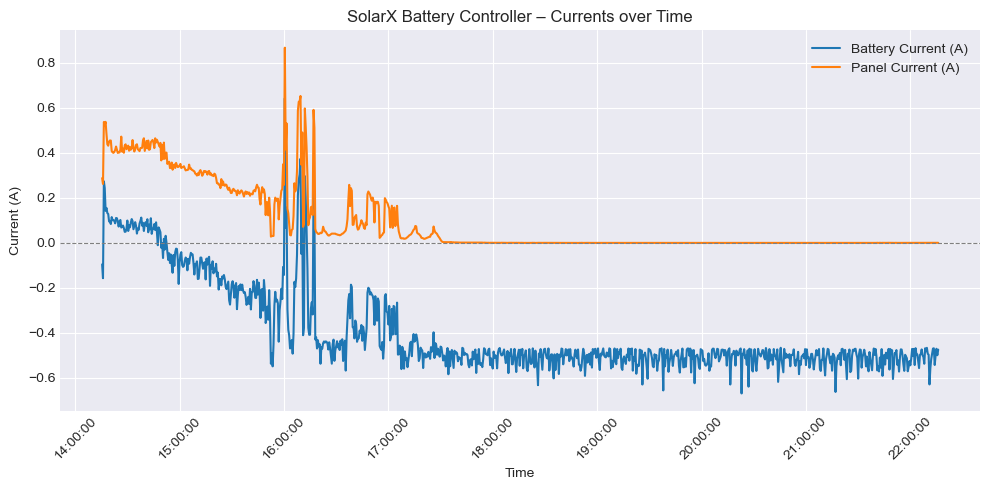

In [4]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["timestamp"], df["batteryCurrentAmps"], label="Battery Current (A)")
ax.plot(df["timestamp"], df["panelCurrentAmps"], label="Panel Current (A)")
ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)
ax.set_title("SolarX Battery Controller – Currents over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Current (A)")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# === 🔋 Gráfico: SOC combinados ===

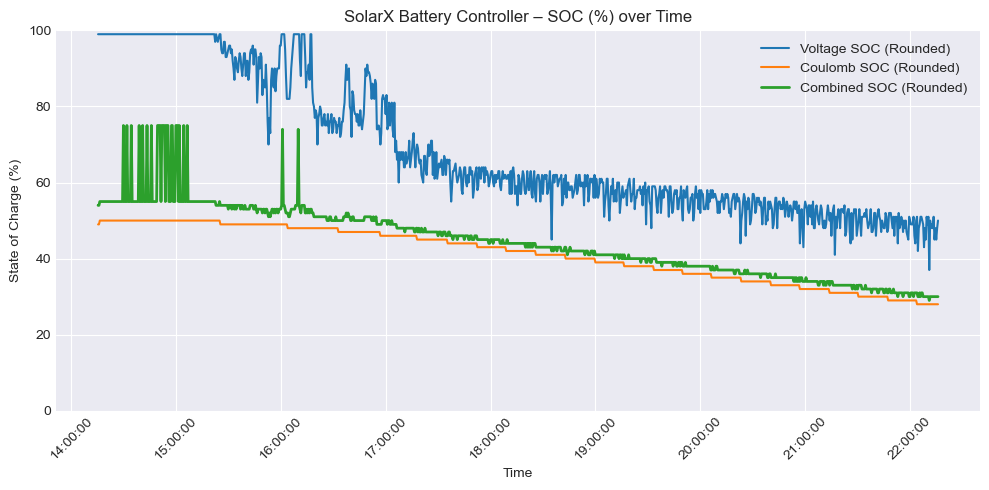

In [5]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["timestamp"], df["voltageSOCRnd"], label="Voltage SOC (Rounded)")
ax.plot(df["timestamp"], df["coulombSOCRnd"], label="Coulomb SOC (Rounded)")
ax.plot(df["timestamp"], df["combinedSOCRnd"], label="Combined SOC (Rounded)", linewidth=2)
ax.set_ylim(0, 100)
ax.set_title("SolarX Battery Controller – SOC (%) over Time")
ax.set_xlabel("Time")
ax.set_ylabel("State of Charge (%)")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# === ⚙️ Gráfico: Potencia neta ===

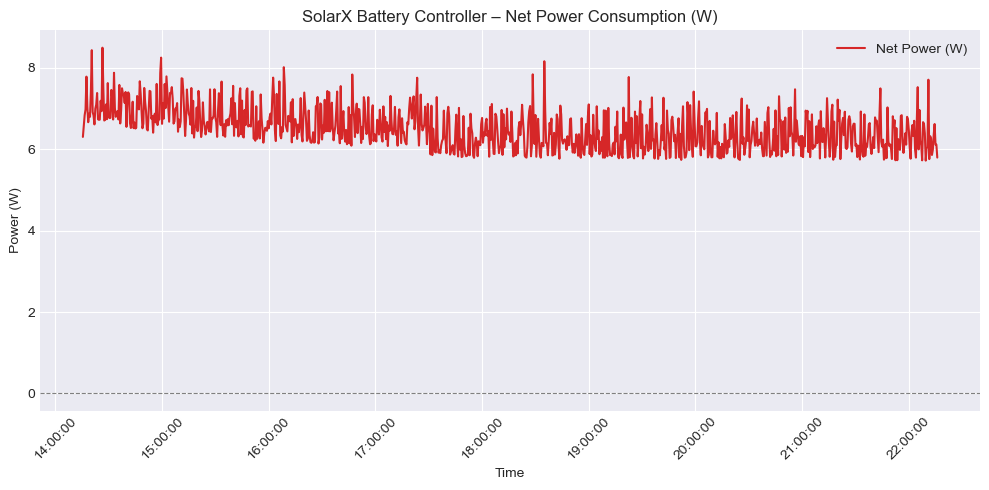

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["timestamp"], df["netPowerWatts"], color="tab:red", label="Net Power (W)")
ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)
ax.set_title("SolarX Battery Controller – Net Power Consumption (W)")
ax.set_xlabel("Time")
ax.set_ylabel("Power (W)")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 🧩 Gráfico combinado resumen (opcional) ===

C:\Users\admin\AppData\Local\Temp\ipykernel_26568\2625426462.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\admin\miniconda3\envs\SP\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


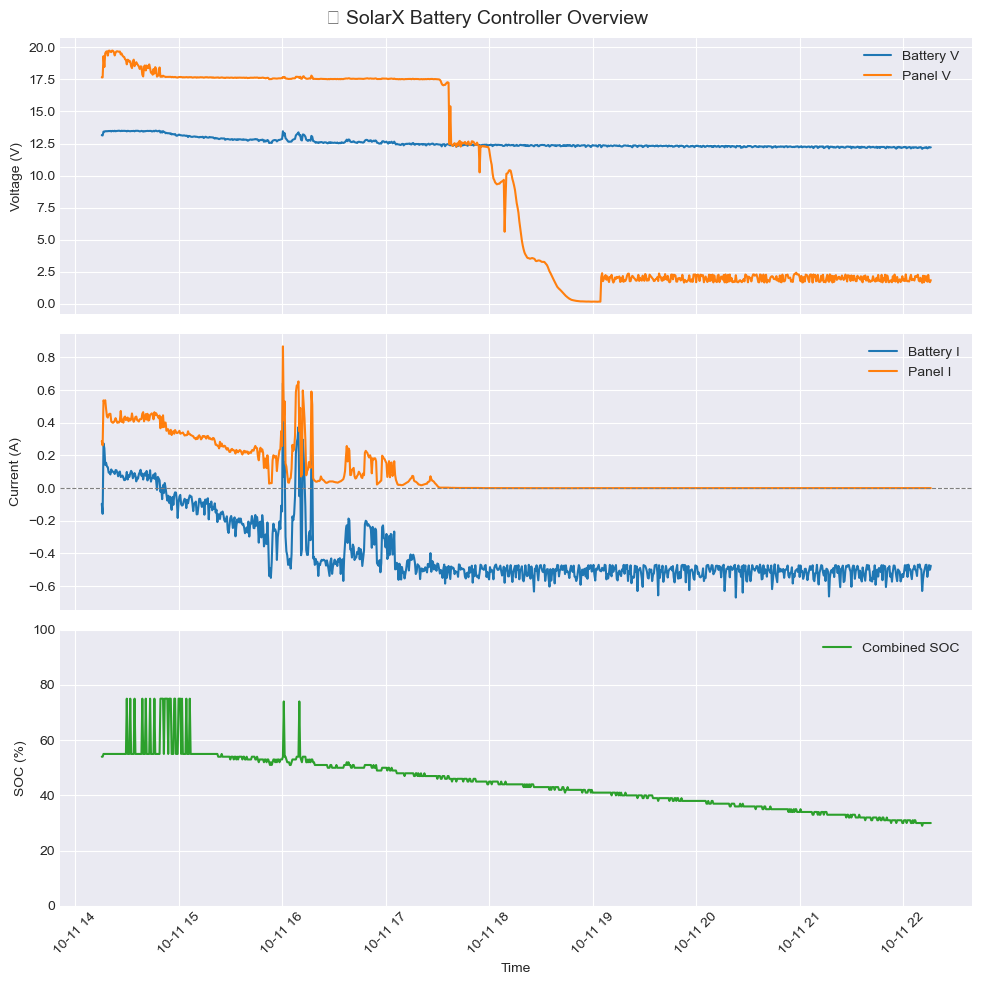

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Voltajes
axs[0].plot(df["timestamp"], df["batteryVoltageVolts"], label="Battery V")
axs[0].plot(df["timestamp"], df["panelVoltageVolts"], label="Panel V")
axs[0].set_ylabel("Voltage (V)")
axs[0].legend()

# Corrientes
axs[1].plot(df["timestamp"], df["batteryCurrentAmps"], label="Battery I")
axs[1].plot(df["timestamp"], df["panelCurrentAmps"], label="Panel I")
axs[1].axhline(0, color="gray", linestyle="--", linewidth=0.8)
axs[1].set_ylabel("Current (A)")
axs[1].legend()

# SOC
axs[2].plot(df["timestamp"], df["combinedSOCRnd"], label="Combined SOC", color="tab:green")
axs[2].set_ylabel("SOC (%)")
axs[2].set_xlabel("Time")
axs[2].set_ylim(0, 100)
axs[2].legend()

fig.suptitle("📊 SolarX Battery Controller Overview", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
